# Random Forest Classification — Theory & Interview Q&A

Random Forest Classification is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting.

| Aspect                | Details                                                                 |
|-----------------------|------------------------------------------------------------------------|
| **Definition**        | Ensemble of decision trees for classification, uses majority voting.     |
| **Equation**          | Aggregates predictions from multiple trees                              |
| **Use Cases**         | Medical diagnosis, fraud detection, customer segmentation               |
| **Assumptions**       | No strict assumptions, handles non-linear relationships                 |
| **Pros**              | Reduces overfitting, handles mixed data, robust to noise                |
| **Cons**              | Less interpretable, slower for large datasets                           |
| **Key Parameters**    | n_estimators, max_depth, min_samples_split, max_features                |
| **Evaluation Metrics**| Accuracy, Precision, Recall, F1-score                                   |

## Interview Q&A

**Q1: What is a Random Forest?**  
A: An ensemble of decision trees that combines their predictions for better accuracy.

**Q2: How does Random Forest reduce overfitting?**  
A: By averaging predictions from many trees, each trained on random subsets.

**Q3: What is bagging?**  
A: Training each tree on a random sample of the data (bootstrap aggregating).

**Q4: What are the advantages of Random Forest?**  
A: Robust to noise, reduces overfitting, handles mixed data types.

**Q5: What are the limitations?**  
A: Less interpretable, slower for large datasets.

**Q6: How do you evaluate Random Forest?**  
A: Using accuracy, precision, recall, and F1-score.

Best Parameters: {'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 10, 'rf__n_estimators': 50}
Test Accuracy: 0.9666666666666667

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11368\3167705562.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


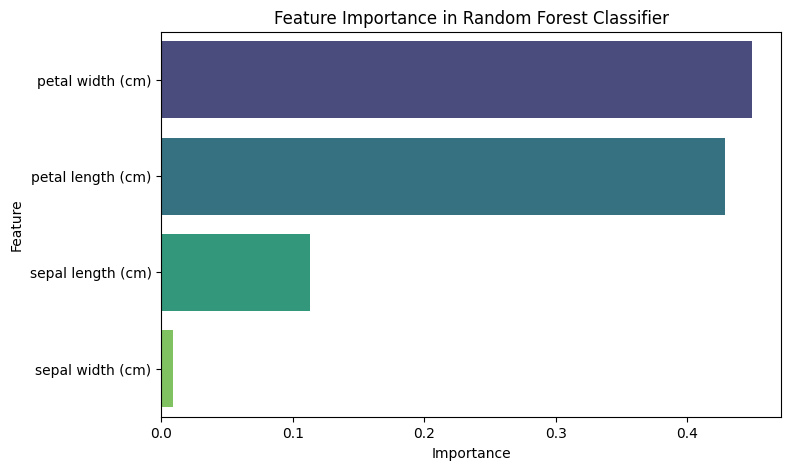

In [1]:
# 1️⃣ Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Load Dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 3️⃣ Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4️⃣ Create Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional for tree-based models
    ('rf', RandomForestClassifier(random_state=42))
])

# 5️⃣ Hyperparameter Tuning
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 3, 5, 7],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 6️⃣ Best Model Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7️⃣ Feature Importance Visualization
importances = best_model.named_steps['rf'].feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title("Feature Importance in Random Forest Classifier")
plt.show()
